In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Downloads/FDI data.csv')

In [16]:
print(data.head())

                     Sector  2000-01  2001-02  2002-03  2003-04  2004-05  \
0  METALLURGICAL INDUSTRIES    22.69    14.14    36.61     8.11   200.38   
1                    MINING     1.32     6.52    10.06    23.48     9.92   
2                     POWER    89.42   757.44    59.11    27.09    43.37   
3   NON-CONVENTIONAL ENERGY     0.00     0.00     1.70     4.14     1.27   
4           COAL PRODUCTION     0.00     0.00     0.00     0.04     0.00   

   2005-06  2006-07  2007-08  2008-09  2009-10  2010-11  2011-12  2012-13  \
0   149.13   169.94  1175.75   959.94   419.88  1098.14  1786.14  1466.23   
1     7.40     6.62   444.36    34.16   174.40    79.51   142.65    57.89   
2    72.69   157.15   988.68   907.66  1271.79  1271.77  1652.38   535.68   
3     1.35     2.44    58.82   125.88   622.52   214.40   452.17  1106.52   
4     9.14     1.30    14.08     0.22     0.00     0.00     0.00     0.00   

   2013-14  2014-15  2015-16  2016-17  
0   567.63   359.34   456.31  1440.18  


In [15]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Sector   63 non-null     object 
 1   2000-01  63 non-null     float64
 2   2001-02  63 non-null     float64
 3   2002-03  63 non-null     float64
 4   2003-04  63 non-null     float64
 5   2004-05  63 non-null     float64
 6   2005-06  63 non-null     float64
 7   2006-07  63 non-null     float64
 8   2007-08  63 non-null     float64
 9   2008-09  63 non-null     float64
 10  2009-10  63 non-null     float64
 11  2010-11  63 non-null     float64
 12  2011-12  63 non-null     float64
 13  2012-13  63 non-null     float64
 14  2013-14  63 non-null     float64
 15  2014-15  63 non-null     float64
 16  2015-16  63 non-null     float64
 17  2016-17  63 non-null     float64
dtypes: float64(17), object(1)
memory usage: 9.0+ KB
None


In [17]:
print(data.describe())

          2000-01     2001-02     2002-03     2003-04     2004-05  \
count   63.000000   63.000000   63.000000   63.000000   63.000000   
mean    37.757302   63.931587   42.925714   34.727778   51.090317   
std    112.227860  157.878737   86.606439   67.653735  101.934873   
min      0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.200000    0.215000    0.715000   
50%      4.030000    5.070000   11.010000    6.370000    9.090000   
75%     23.510000   44.830000   36.555000   38.660000   43.205000   
max    832.070000  873.230000  419.960000  368.320000  527.900000   

           2005-06      2006-07      2007-08      2008-09      2009-10  \
count    63.000000    63.000000    63.000000    63.000000    63.000000   
mean     87.932540   198.281905   390.085714   498.348571   410.069524   
std     206.436967   686.783115  1026.249935  1134.649040   926.814626   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%     

In [6]:
# Checking for missing values
print(data.isnull().sum())

Sector     0
2000-01    0
2001-02    0
2002-03    0
2003-04    0
2004-05    0
2005-06    0
2006-07    0
2007-08    0
2008-09    0
2009-10    0
2010-11    0
2011-12    0
2012-13    0
2013-14    0
2014-15    0
2015-16    0
2016-17    0
dtype: int64


C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

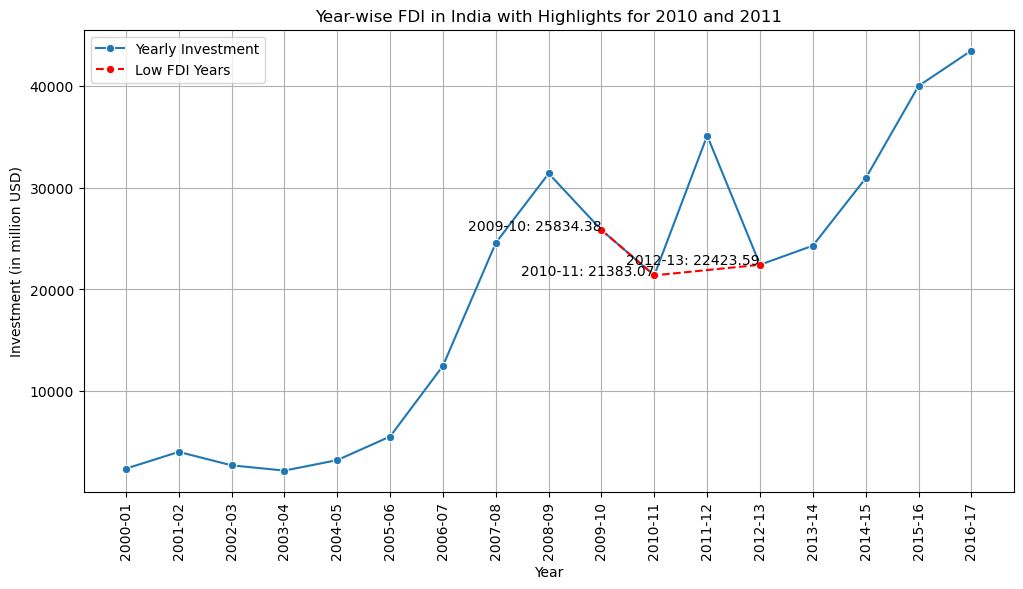

In [9]:
# Calculate yearly investment
yearly_investment = data.iloc[:, 1:].sum(axis=0)

# Plotting Year-wise Investment with emphasis on 2010 and 2011
plt.figure(figsize=(12, 6))

# Normal line plot for all years except 2010 and 2011
sns.lineplot(x=yearly_investment.index, y=yearly_investment.values, marker='o', label='Yearly Investment')

# Highlight 2010 and 2011 with a dotted line
highlight_years = ['2009-10', '2010-11','2012-13']
highlight_values = yearly_investment.loc[highlight_years]

sns.lineplot(x=highlight_years, y=highlight_values, marker='o', linestyle='--', color='red', label='Low FDI Years')

# Add text annotation
for year in highlight_years:
    plt.text(year, yearly_investment[year], f'{year}: {yearly_investment[year]:.2f}', horizontalalignment='right')

# General plot settings
plt.title('Year-wise FDI in India with Highlights for 2010 and 2011')
plt.xlabel('Year')
plt.ylabel('Investment (in million USD)')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()


# Here are few key findings from the year-wise FDI analysis in India, with a focus on the years 2010 and 2011:
# 
# 1. **Significant Decline in 2010 and 2011**:
#    - The years 2010-11 and 2011-12 saw a noticeable dip in FDI compared to surrounding years, highlighting a period of reduced investment.
# 
# 2. **Recovery Post-2011**:
#    - Following the dip in 2010-11 and 2011-12, there was a significant recovery and an upward trend in FDI, indicating renewed investor confidence.
# 
# 
# 3. **Consistent Sectors Amid Decline**:
#    - Despite the overall dip, sectors like 'COMPUTER SOFTWARE & HARDWARE' and 'TELECOMMUNICATIONS' maintained relatively stable FDI, indicating their resilience.
#    
#    

# ### Sectors with lowest and highest FDI

In [10]:
# Extract FDI data for 2009-10 and 2010-11
data_2009_10 = data[['Sector', '2009-10']].sort_values(by='2009-10')
data_2010_11 = data[['Sector', '2010-11']].sort_values(by='2010-11')

# Find sectors with lowest and highest FDI for 2009-10
lowest_2009_10 = data_2009_10.iloc[0]
highest_2009_10 = data_2009_10.iloc[-1]

# Find sectors with lowest and highest FDI for 2010-11
lowest_2010_11 = data_2010_11.iloc[0]
highest_2010_11 = data_2010_11.iloc[-1]

# Print out the sectors with their FDI values
print("Sector with the lowest FDI in 2009-10:", lowest_2009_10['Sector'], "with FDI:", lowest_2009_10['2009-10'])
print("Sector with the highest FDI in 2009-10:", highest_2009_10['Sector'], "with FDI:", highest_2009_10['2009-10'])
print("Sector with the lowest FDI in 2010-11:", lowest_2010_11['Sector'], "with FDI:", lowest_2010_11['2010-11'])
print("Sector with the highest FDI in 2010-11:", highest_2010_11['Sector'], "with FDI:", highest_2010_11['2010-11'])


# Here are the key points for the sectors with the lowest and highest FDI in 2009-10 and 2010-11:
# 
# 1. **2009-10 FDI Highlights**:
#    - **Lowest FDI**: The sector 'PHOTOGRAPHIC RAW FILM AND PAPER' received the lowest FDI at 0.0 million USD.
#    - **Highest FDI**: The 'CONSTRUCTION DEVELOPMENT' sector received the highest FDI at 5466.13 million USD.
# 
# 2. **2010-11 FDI Highlights**:
#    - **Lowest FDI**: The sector 'MATHEMATICAL, SURVEYING AND DRAWING INSTRUMENTS' received the lowest FDI at 0.0 million USD.
#    - **Highest FDI**: The 'SERVICES SECTOR' (including finance, banking, insurance, and other sub-sectors) received the highest FDI at 3296.09 million USD.
# 
# 3. **Sectoral FDI Variability**:
#    - The FDI data for both years shows significant variability, with certain sectors receiving no investments while others, like 'CONSTRUCTION DEVELOPMENT' and 'SERVICES SECTOR', attracted substantial foreign capital.
#    
#    

# ### Scatter plots for Lowest and Highest FDI Sectors for 2009-10 and 2010-11

Sector with the lowest FDI in 2009-10: PHOTOGRAPHIC RAW FILM AND PAPER with FDI: 0.0
Sector with the highest FDI in 2009-10: CONSTRUCTION DEVELOPMENT: Townships, housing, built-up infrastructure and construction-development projects with FDI: 5466.13
Sector with the lowest FDI in 2010-11: MATHEMATICAL,SURVEYING AND DRAWING INSTRUMENTS with FDI: 0.0
Sector with the highest FDI in 2010-11: SERVICES SECTOR (Fin.,Banking,Insurance,Non Fin/Business,Outsourcing,R&D,Courier,Tech. Testing and Analysis, Other) with FDI: 3296.09


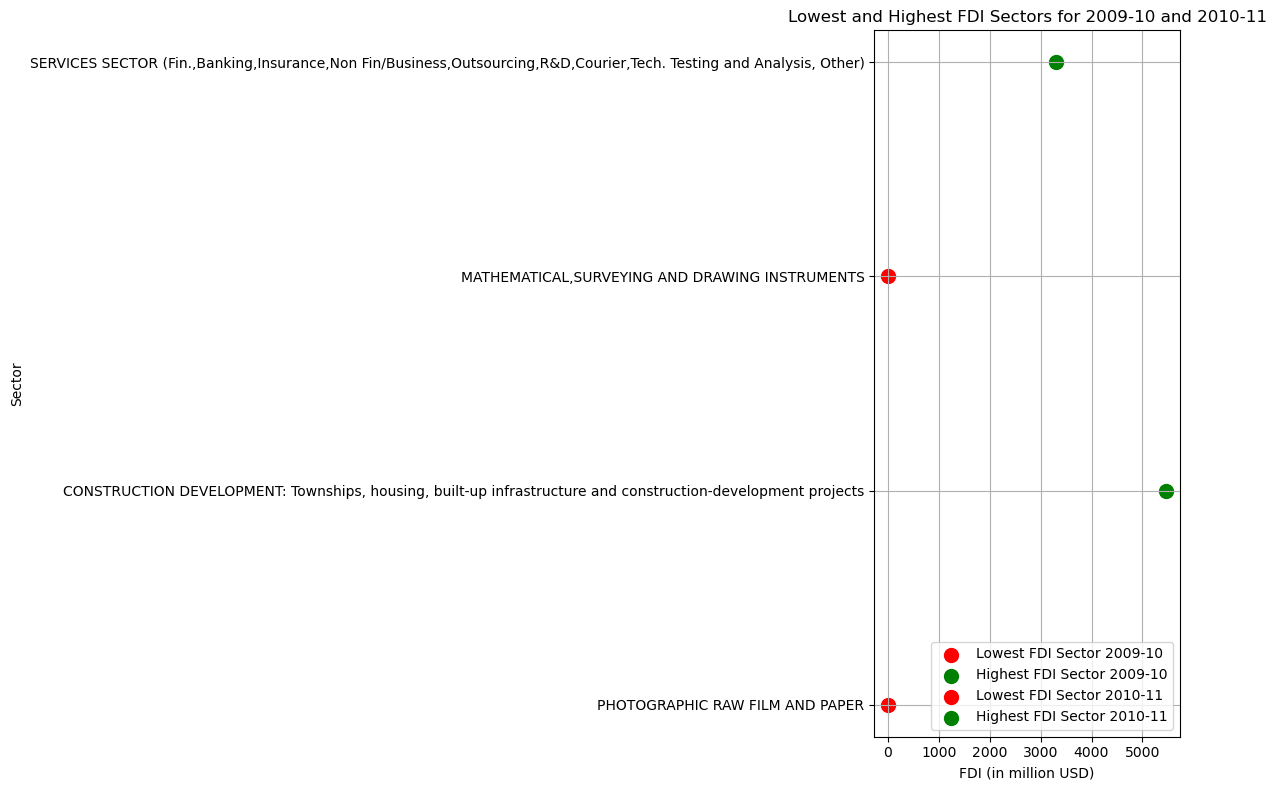

In [11]:
# Extract FDI data for the relevant years
data_years = ['2009-10', '2010-11']  # Adjust as needed for other years
sectors = data['Sector']
fdi_years = data[['Sector'] + data_years]

# Initialize a figure and axis for scatter plots
plt.figure(figsize=(12, 8))

# Iterate over each year to plot lowest and highest FDI sectors
for i, year in enumerate(data_years, 1):
    # Find sectors with lowest and highest FDI for the current year
    lowest_sector = fdi_years.sort_values(by=year).iloc[0]['Sector']
    highest_sector = fdi_years.sort_values(by=year).iloc[-1]['Sector']
    
    # Plot lowest FDI sector
    plt.scatter(fdi_years.loc[fdi_years['Sector'] == lowest_sector, year], lowest_sector, 
                color='red', label=f'Lowest FDI Sector {year}', marker='o', s=100)
    
    # Plot highest FDI sector
    plt.scatter(fdi_years.loc[fdi_years['Sector'] == highest_sector, year], highest_sector, 
                color='green', label=f'Highest FDI Sector {year}', marker='o', s=100)

# Add labels and title
plt.xlabel('FDI (in million USD)')
plt.ylabel('Sector')
plt.title('Lowest and Highest FDI Sectors for 2009-10 and 2010-11')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


# 
#  **scatter plots for FDI Variability**:
#    - The FDI data for both years shows significant variability, with certain sectors receiving no investments while others, like 'CONSTRUCTION DEVELOPMENT' and 'SERVICES SECTOR', attracted substantial foreign capital.

# ### Sector-wise Investment for top N sectors


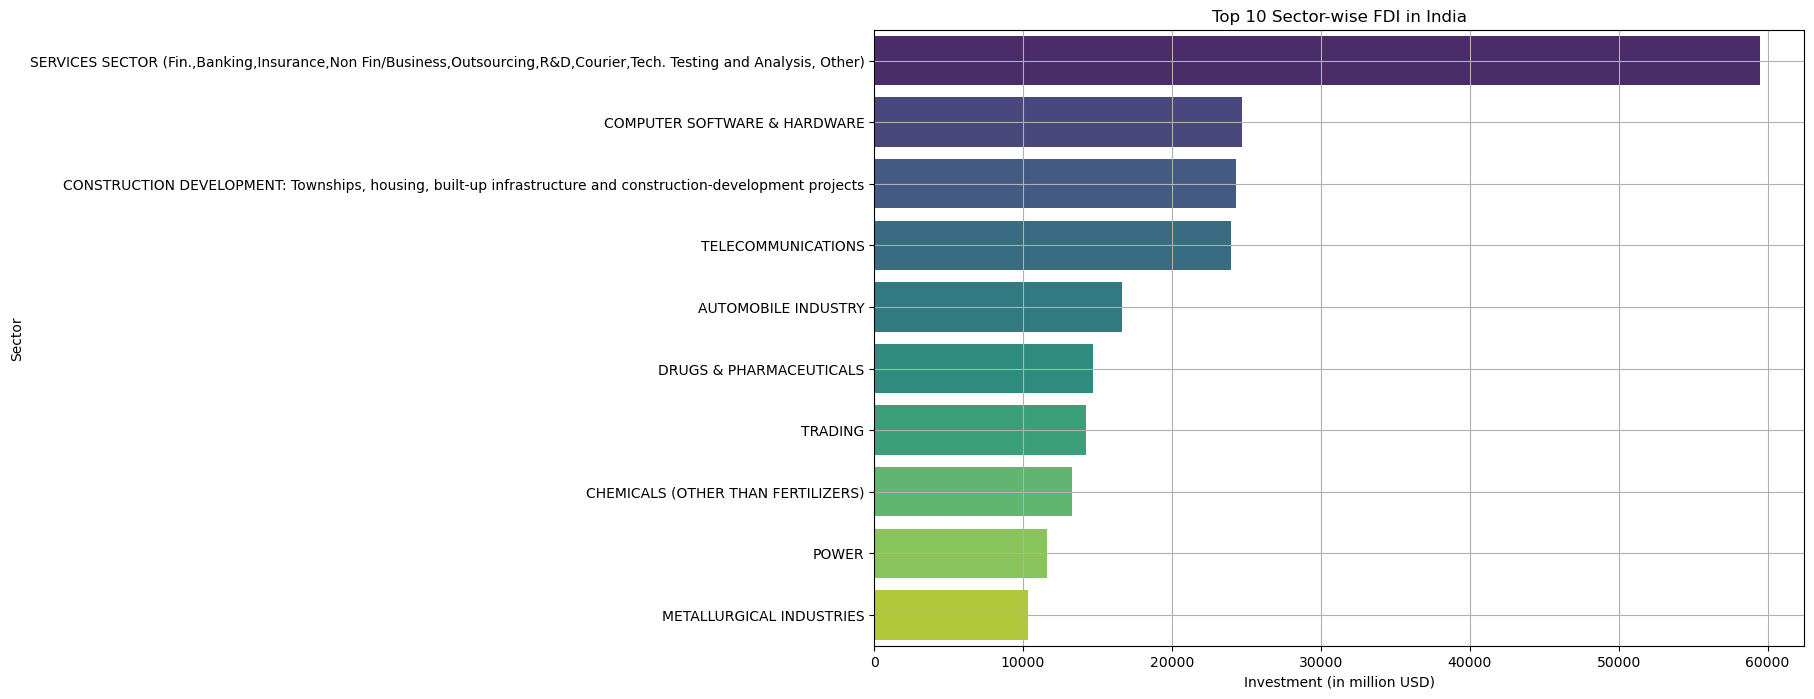

In [19]:
# Calculate total investment for each sector
sector_investment = data.set_index('Sector').sum(axis=1)

# Sort sectors by investment value
sector_investment_sorted = sector_investment.sort_values(ascending=False)

# Select top N sectors to display
top_n = 10
top_sector_investment = sector_investment_sorted.head(top_n)

# Plotting Sector-wise Investment for top N sectors
plt.figure(figsize=(12, 8))
sns.barplot(x=top_sector_investment.values, y=top_sector_investment.index, orient='h', palette='viridis')
plt.title(f'Top {top_n} Sector-wise FDI in India')
plt.xlabel('Investment (in million USD)')
plt.ylabel('Sector')
plt.grid(True)
plt.show()


#  key Analysis for sector-wise FDI investment focusing on the top sectors:
# 
# 1. **Services Sector Dominance**:
#    - The 'SERVICES SECTOR' (including finance, banking, insurance, non-financial business, outsourcing, R&D, courier, tech testing, and analysis) consistently attracted the highest FDI inflows, highlighting its critical role in India's economic landscape.
# 
# 2. **Tech and Telecom Growth**:
#    - 'COMPUTER SOFTWARE & HARDWARE' and 'TELECOMMUNICATIONS' sectors showed substantial and steady growth in FDI. These sectors benefited from India's strong IT infrastructure and growing digital economy.
# 
# 3. **Construction and Infrastructure Development**:
#    - The 'CONSTRUCTION DEVELOPMENT' sector, which includes townships, housing, built-up infrastructure, and development projects, consistently received high FDI, reflecting the ongoing urbanization and infrastructure expansion in India.
# 
# 4. **Manufacturing and Industrial Investment**:
#    - The 'AUTOMOBILE INDUSTRY' and 'METALLURGICAL INDUSTRIES' were other top sectors receiving significant FDI. This trend underscores India's position as a manufacturing hub and its efforts to boost the industrial sector through policies like 'Make in India'.
# 
# 5. **Emerging Sectors**:
#    - Emerging sectors like 'PHARMACEUTICALS' and 'NON-CONVENTIONAL ENERGY' (e.g., renewable energy) also saw increasing FDI inflows, indicating a diversification of investment into sustainable and high-growth potential areas driven by supportive government policies and global trends towards sustainability.
